In [2]:
from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.052801911914820865
Avg Annual Return (Ari): 0.08534875681079362
Volatility (Std): 0.2560724417866475
Sharpe Ratio: 0.20619911907121174
Downside Volatility: 0.18379575665184777
Sortino Ratio: 0.2872858050517459
VaR 99: -0.04221279649156794
VaR 99 (Year): -0.4779677337926634
CVaR 99: -0.06390772924618005
CVaR 99 (Year): -0.4779677337926634
Initial Value: 2568.300048828125
Peak Value: 33154.12109375
Final Value: 17090.23046875
Max Drawdown: 0.6518186042408531
Avg Drawdown: 0.254114817915096
Calmar Ratio: 0.08100706480496538
Sterling Ratio: 0.2077876148586615
Monthly Stats: 
           mean        std    median        q1        q3        max        min
Month                                                                         
1      0.108838   7.381218  0.708198 -5.570009  5.691372  13.529388 -14.893693
2      1.563425   6.013340  1.250924 -1.857724  6.485447  11.481628 -11.978626
3     -0.879

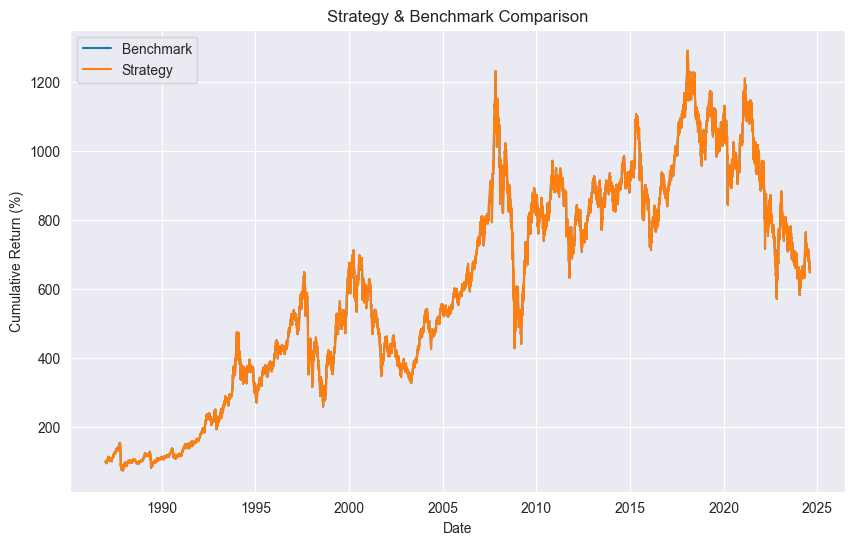

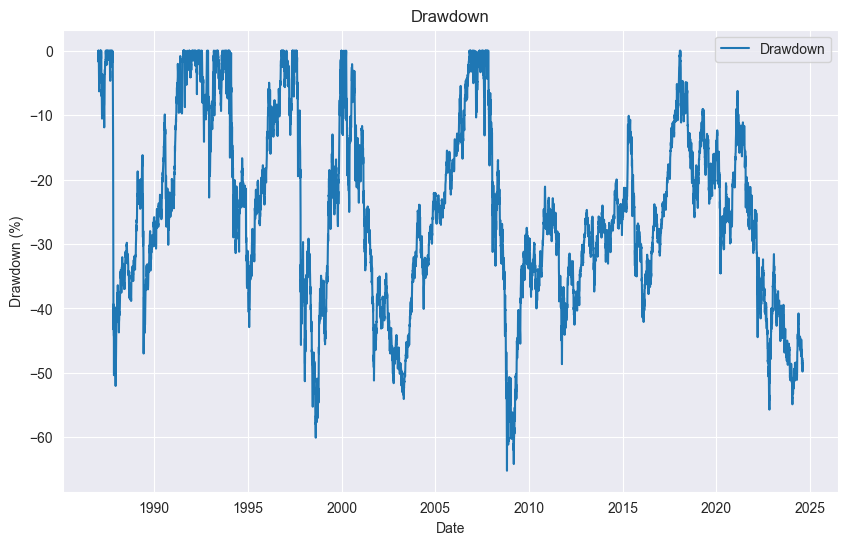

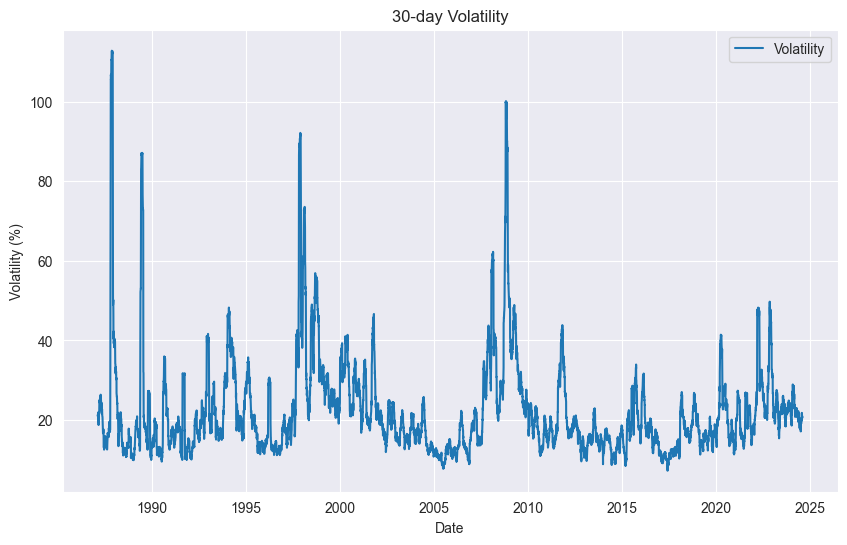

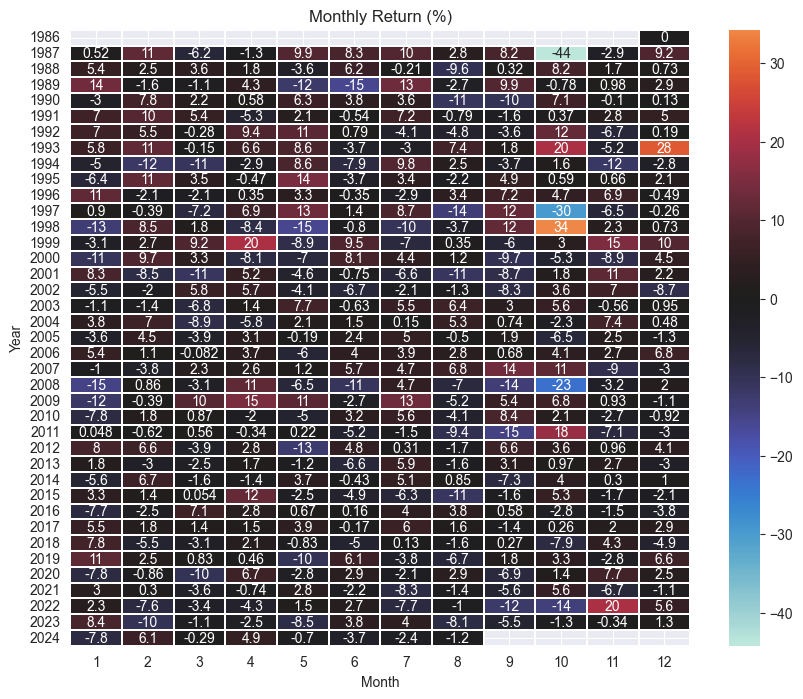

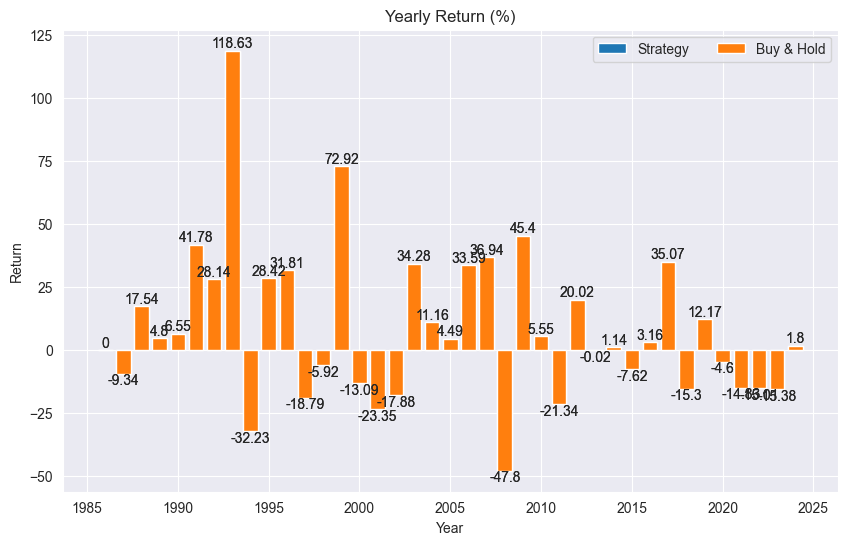

In [3]:
start_date = '1960-01-01'
hsi = yf.download('^HSI', start=start_date)

hsi_df = pd.DataFrame()
hsi_df['Price'] = hsi['Adj Close']
hsi_df['Value'] = hsi['Adj Close']
hsi_df['Return'] = hsi['Adj Close'].pct_change()

test_hsi = Backtest(hsi_df)

Monthly Analysis

In [8]:
monthly_df = pd.DataFrame(test_hsi.results['Monthly Return'].copy())
monthly_stats = monthly_df.groupby(monthly_df.index.month).describe()['Monthly Return']
monthly_stats.index.name = 'Month'
monthly_stats = monthly_stats * 100
monthly_stats['count'] /= 100
monthly_stats['mean / std'] = monthly_stats['mean'] / monthly_stats['std']
monthly_stats

,count,mean,std,min,25%,50%,75%,max,mean / std
Month,,,,,,,,,
1,38.0,0.108838,7.381218,-14.893693,-5.570009,0.708198,5.691372,13.529388,0.014745
2,38.0,1.563425,6.013340,-11.978626,-1.857724,1.250924,6.485447,11.481628,0.259993
3,38.0,-0.879580,5.154553,-11.141069,-3.575542,-0.285075,2.075457,10.217688,-0.170641
4,38.0,2.354639,5.988174,-8.363668,-1.186273,1.730765,5.109608,20.412027,0.393215
5,38.0,-0.020078,7.435194,-15.421900,-4.928106,0.010806,3.851170,14.361784,-0.002700
6,38.0,-0.192971,5.399910,-15.468405,-3.713004,-0.262341,3.635697,9.451809,-0.035736
7,38.0,1.583916,6.002740,-10.488869,-2.786778,3.517338,5.438338,13.224416,0.263866
8,38.0,-1.932849,5.445387,-13.700303,-5.097114,-1.348716,2.293343,7.407884,-0.354952
9,37.0,-0.499892,7.438486,-14.539091,-5.987439,0.316441,4.890989,13.547392,-0.067204


In [9]:
# with pd.ExcelWriter('HSI_monthly.xlsx') as writer:  
#     monthly_stats.to_excel(writer, sheet_name='monthly_stats')

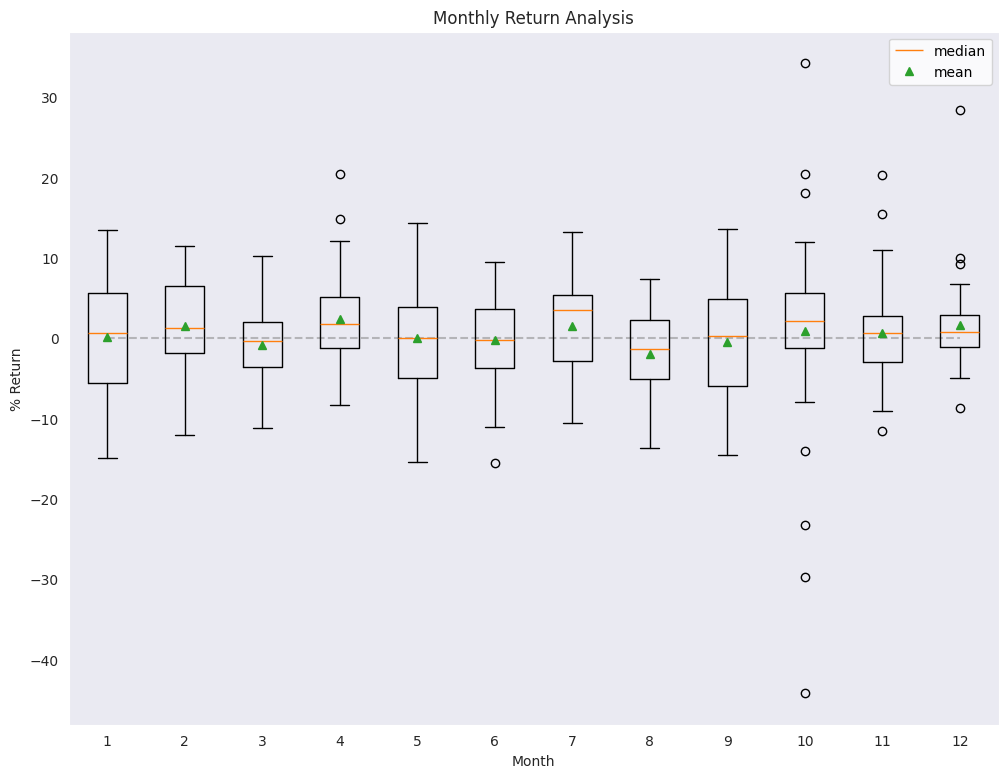

In [10]:
dfs = [_df for _df in monthly_df['Monthly Return'].groupby(monthly_df.index.month)]
array_of_df = []

vals, names, xs = [],[],[]

for _df in dfs:
    new_df: pd.Series = _df[1] * 100
    new_df.name = str(_df[0])
    vals.append(new_df.values.tolist())
    names.append(new_df.name)
    xs.append([int(new_df.name) for i in range(len(new_df.index))])

all_mean = monthly_df['Monthly Return'].mean()

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot([i + 1 for i in range(12)], [all_mean for i in range(12)], alpha=0.5
         , linestyle='--', color='grey', label='overall mean return')
bp = plt.boxplot(vals, showmeans=True, tick_labels=names)
# for x, val in zip(xs, vals):
#     plt.scatter(x, val, alpha=0.2)

plt.style.use('default')
plt.title('Monthly Return Analysis')
plt.xlabel('Month')
plt.ylabel('% Return')
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.grid(False)
# plt.savefig('hsi_monthly_return.png')
plt.show()